In [2]:
import pandas as pd
import numpy as np
traffic_data2 = pd.read_excel("TDCS_M06A_20190830_080000.xlsx", header=None)
traffic_data = pd.read_csv("TDCS_M06A_20190830_080000.csv", header=None)
traffic_data.columns = list(traffic_data2.drop([1]).drop(columns = [2]).iloc[0])

### Overall Display

In [3]:
traffic_data.head(5).to_string()

'   Vehicle Type     Derection Time_O GantryID_O      DerectionTime_D GantryID_D  Trip Length Trip End                                            Trip Information\n0            31  2019-08-30 08:17:14   03F3307N  2019-08-30 08:17:14   03F3307N          5.2        Y                                2019-08-30 08:17:14+03F3307N\n1            31  2019-08-30 08:01:02   03F0648S  2019-08-30 08:01:02   03F0648S          5.6        Y                                2019-08-30 08:01:02+03F0648S\n2            31  2019-08-30 08:51:45   03F0648N  2019-08-30 08:57:09   03F0559N         13.9        Y  2019-08-30 08:51:45+03F0648N; 2019-08-30 08:57:09+03F0559N\n3            31  2019-08-30 08:20:45   03F3854S  2019-08-30 08:20:45   03F3854S          8.6        Y                                2019-08-30 08:20:45+03F3854S\n4            32  2019-08-30 08:06:10   03F4168S  2019-08-30 08:09:33   03F4232S          9.3        Y  2019-08-30 08:06:10+03F4168S; 2019-08-30 08:09:33+03F4232S'

### Data of the 1st column

In [2]:
lst_vtype = list(traffic_data['Vehicle Type'])
lst_cnt = [0 for i in range(max(lst_vtype)+1)]

for i in lst_vtype:
    lst_cnt[i]+=1

dic_vtype = {}
for i in lst_cnt:
    if i != 0:
        dic_vtype[lst_cnt.index(i)] = i

In [3]:
per_vtype = ['%4.2f%%'%(i*100) for i in np.array([int(i) for i in dic_vtype.values()])/np.sum(np.array([int(i) for i in dic_vtype.values()]))]
# lst_vnames = ['联结車','小客車','小貨車','大客車','大貨車']
lst_vnames = ['combination vehicles','taxicab','light delivery truck','bus','goods vehicle']
zip(lst_vnames,per_vtype)
labels_vtype = [i for i in zip(lst_vnames,per_vtype)]

([<matplotlib.patches.Wedge at 0x7fd9a14a9350>,
 [Text(1.0903579614622154, 0.1453255513526855, "('combination vehicles', '4.22%')"),
  Text(-0.7222288926294592, 0.8296899581477561, "('taxicab', '64.36%')"),
  Text(0.3800034251318425, -1.032277771187614, "('light delivery truck', '24.06%')"),
  Text(1.0068202395152503, -0.4430722348584419, "('bus', '1.51%')"),
  Text(1.0815262343857128, -0.20075110045890304, "('goods vehicle', '5.84%')")])

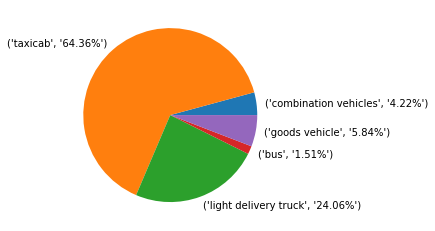

In [4]:
import matplotlib.pyplot as plt
plt.pie(dic_vtype.values(), labels = labels_vtype)

### Data of the 3nd column  
- First 5  
- Last 5   
- Almost exp distribution

01F3696N    5630
01F3640N    3950
01F0248S    3673
01F0376N    3610
01F0339S    3388
Name: GantryID_O, dtype: int64
05F0439S    24
03F2709N    21
03F2899N    19
03F2747N    17
05FR143N     6
Name: GantryID_O, dtype: int64


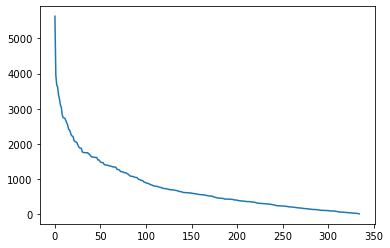

In [24]:
data_gantryid = traffic_data['GantryID_O']
set_gid = set(list(data_gantryid))
lst_value = [0 for i in range(len(set(list(data_gantryid))))]
dic_gid = dict(zip(set_gid,lst_value))
print(data_gantryid.value_counts().head(5))
print(data_gantryid.value_counts().tail(5))
t = pd.DataFrame(data_gantryid.value_counts()).sort_values('GantryID_O',ascending = False)
plt.plot(range(len(t)),t['GantryID_O'])

### Data of Trip length

count    259623.000000
mean         21.684064
std          31.523915
min           1.100000
25%           6.200000
50%          11.900000
75%          23.800000
max         417.800000
Name: Trip Length, dtype: float64


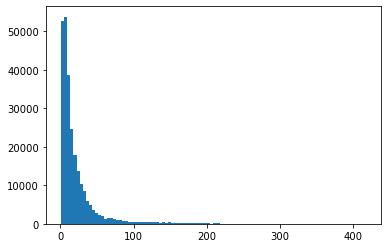

In [23]:
data_tl = traffic_data['Trip Length']
lst_tl = list(data_tl)

def quick_count_sort(lis):
    import collections
    
    def quick_sort(lis, start, end):
        if end > start:
            pivot = split(lis, start, end)
            quick_sort(lis, start, pivot-1)
            quick_sort(lis, pivot+1, end)

    def split(lis, start, end):
        
        pivot = lis[end]
        cur = start
        for i in range(start, end):
            if lis[i] < pivot:
                lis[i], lis[cur] = lis[cur], lis[i]
                cur += 1
        lis[cur], lis[end] = lis[end], lis[cur]
        return cur
    

    record = collections.Counter(lis)
    keys = list(record.keys())
    
    quick_sort(keys, 0, len(keys)-1)

    rtn = []
    for k in keys:
        rtn += [k for i in range(record[k])]

    return rtn

lst_tl_sorted = quick_count_sort(lst_tl)
print(data_tl.describe())
plt.hist(lst_tl_sorted, bins = 100)
plt.show()

In [7]:
traffic_data2.drop([1]).drop(columns = [2]).iloc[0]

0        Vehicle Type
1    Derection Time_O
3          GantryID_O
4     DerectionTime_D
5          GantryID_D
6         Trip Length
7            Trip End
8    Trip Information
Name: 0, dtype: object